In [2]:
#call dependencies 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json
from config import api_key
from citipy import citipy
#https://github.com/kundami/python-challenge/blob/master/PyWeather/WeatherPy.py

In [3]:
#generate cities list 
#set ranges for latitude and longitude 
lat = (-90, 90)
long = (-180, 180)

#generate random coordinate points
lat = np.random.uniform(low=-90, high=90, size=1500)
long = np.random.uniform(low=-180, high=180, size=1500)

#combine/zip the latitude and longitude list 
lat_long_list = list(zip(lat, long))
#print(lat_long_list)


In [4]:
#find corresponding cities to coordinate points 
cities = []

#for loop and append to list 
for point in lat_long_list:
    x = citipy.nearest_city(point[0], point[1]).city_name
    if x not in cities:
        cities.append(x)

#print(cities)
#print(len(cities))


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
#query_url = f"{url}+appid={api_key}+&q="

#create lists to hold info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []


for city in cities:
    #loop through list to create query url, replace spaces to create working links
    query_url = url + "appid=" + api_key + "&q=" + city
    query_url = query_url.replace(" ", "+")

    #create json file
    response = requests.get(query_url).json()
    #print(json.dumps(weather_json, indent=4, sort_keys=True))

    #append info into lists
    if response["cod"] == 200:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    

In [11]:
#create dataframe
weather_df = pd.DataFrame({"City": city_name,
                "Cloudiness": cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": long,
                "Max Temp": max_temp,
                "Wind Speed": wind_speed})

weather_df.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,36,AU,1521130259,92,-33.21,138.60,54.85,5.21
1,Port Alfred,92,ZA,1521130260,100,-33.59,26.89,64.57,16.73
2,Shu,76,KZ,1521130260,98,43.60,73.76,34.24,9.13
3,Saint-Philippe,75,CA,1521128760,64,45.36,-73.48,33.80,16.11
4,Poum,40,MK,1521126000,57,41.28,20.71,50.00,6.93


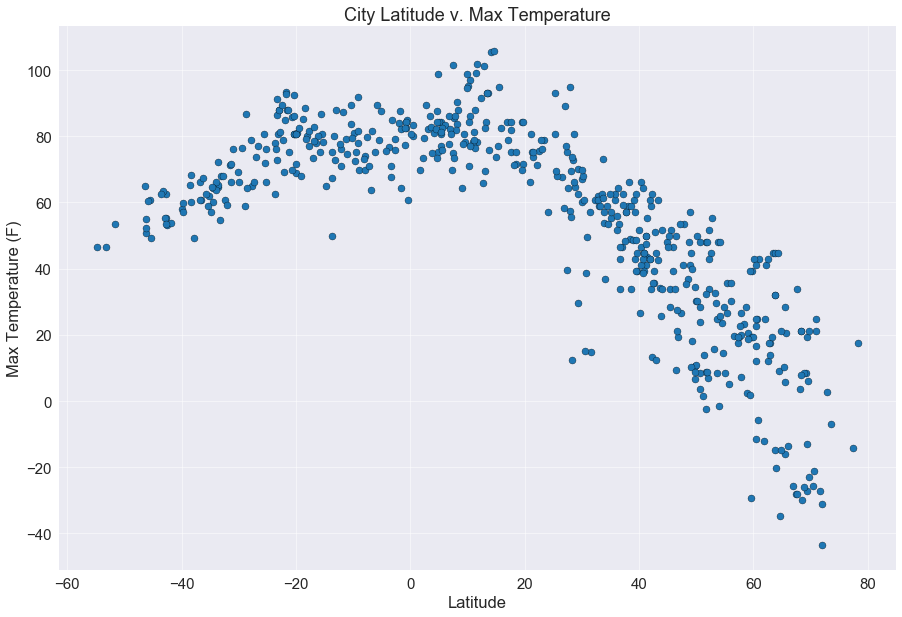

In [30]:
#latitude v temperature
#assign data to x- and y-
city_lat = weather_df["Lat"]
city_temp = weather_df["Max Temp"] 

#charts aesthetics 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

ax.grid(which="major", alpha=0.5)
sns.set_style("darkgrid")

#create scatter plot
plt.scatter(city_lat, city_temp, edgecolor="black")

#add labels
plt.title("City Latitude v. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.show()

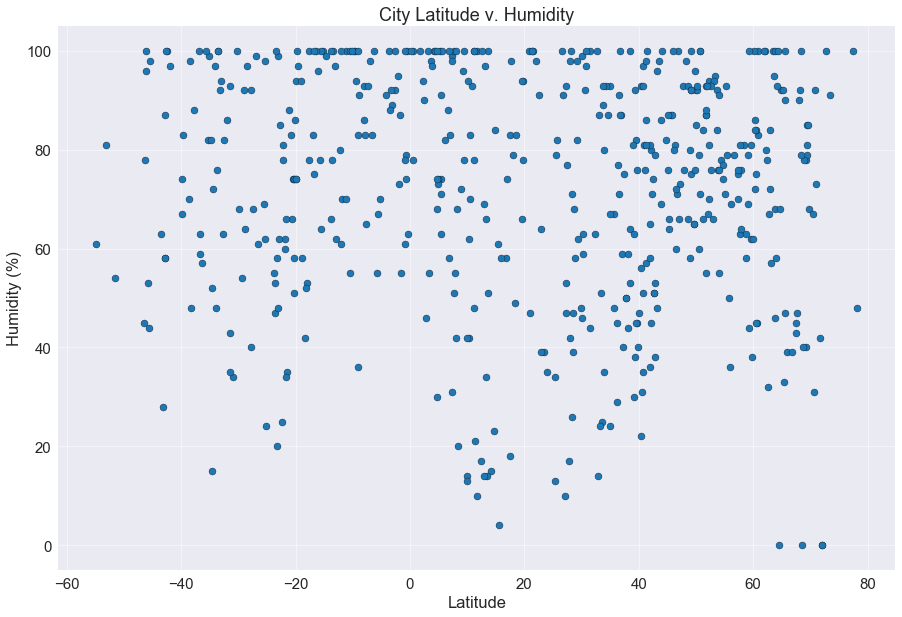

In [32]:
#latidude v humidity
city_hum = weather_df["Humidity"]

#charts aesthetics 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

ax.grid(which="major", alpha=0.5)
sns.set_style("darkgrid")

#create scatter plot
plt.scatter(city_lat, city_hum, edgecolor="black")

#add labels
plt.title("City Latitude v. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

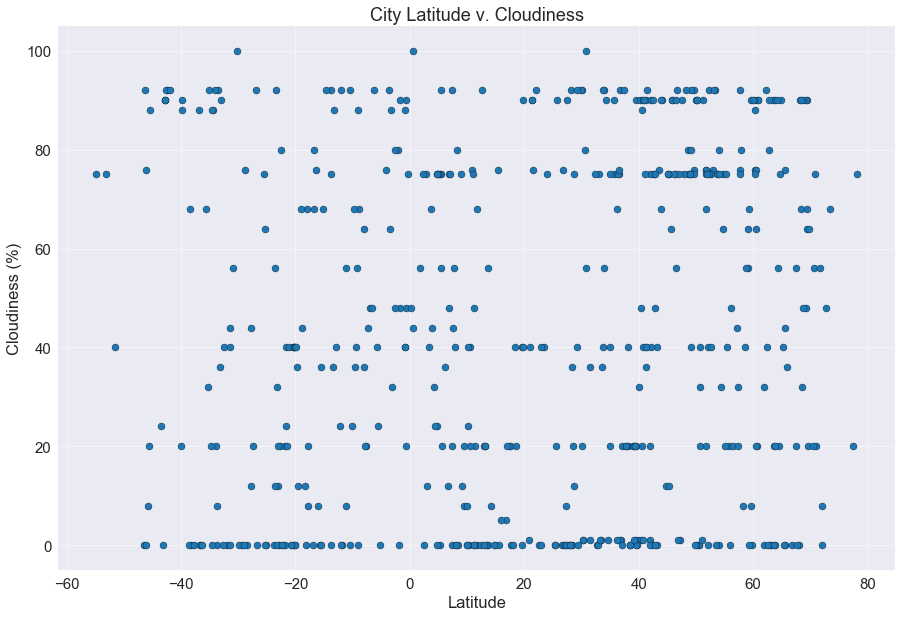

In [33]:
#latidude v cloudiness
city_cloud = weather_df["Cloudiness"]

#charts aesthetics 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

ax.grid(which="major", alpha=0.5)
sns.set_style("darkgrid")

#create scatter plot
plt.scatter(city_lat, city_cloud, edgecolor="black")

#add labels
plt.title("City Latitude v. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

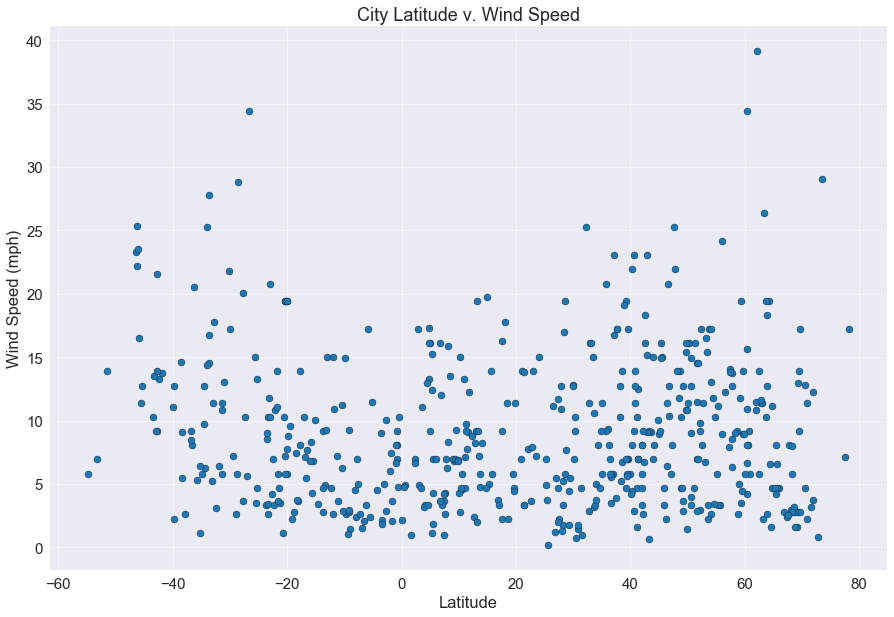

In [34]:
#latidude v windspeed
city_wind = weather_df["Wind Speed"]

#charts aesthetics 
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)

ax.grid(which="major", alpha=0.5)
sns.set_style("darkgrid")

#create scatter plot
plt.scatter(city_lat, city_wind, edgecolor="black")

#add labels
plt.title("City Latitude v. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()

In [60]:
x = []

asdf = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f69e8609b24ababd74a0428bbcc559f2&q=esperance"

a = requests.get(asdf).json()
x.append(a["name"])

#print(json.dumps(a, indent=4, sort_keys=True))
print(x)

['Esperance']
